In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random

In [4]:
#http://www.football-data.co.uk/notes.txt

In [5]:
#load data (make sure you have downloaded database.sqlite)
with sqlite3.connect('data/database.sqlite') as con:
    table_names = pd.read_sql_query('SELECT name FROM sqlite_master WHERE type="table" ORDER BY name;', con)
    countries_all = pd.read_sql_query("SELECT * from Country", con)
    matches_all = pd.read_sql_query("SELECT * from Match", con)
    leagues_all = pd.read_sql_query("SELECT * from League", con)
    teams_all = pd.read_sql_query("SELECT * from Team", con)

In [6]:
table_names

,name
0,Country
1,League
2,Match
3,Player
4,Player_Attributes
5,Team
6,Team_Attributes
7,sqlite_sequence


In [7]:
countries_all[:5]

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [8]:
spain_id = countries_all.loc[countries_all['name'] == 'Spain', 'id'].iloc[0]
matches = matches_all.loc[(matches_all['country_id'] == spain_id) & (matches_all['season'] == '2015/2016')]

In [9]:
#list(matches.columns)
matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
24177,24178,21518,21518,2015/2016,1,2015-08-23 00:00:00,2030082,8581,9910,1,...,NaN,3.75,3.40,2.15,NaN,NaN,NaN,NaN,NaN,NaN
24178,24179,21518,21518,2015/2016,1,2015-08-22 00:00:00,2030083,9906,8306,1,...,NaN,1.22,6.50,19.00,NaN,NaN,NaN,NaN,NaN,NaN
24179,24180,21518,21518,2015/2016,1,2015-08-21 00:00:00,2030084,9864,8302,0,...,NaN,3.40,3.50,2.25,NaN,NaN,NaN,NaN,NaN,NaN
24180,24181,21518,21518,2015/2016,1,2015-08-23 00:00:00,2030085,8315,8634,0,...,NaN,6.50,4.60,1.53,NaN,NaN,NaN,NaN,NaN,NaN
24181,24182,21518,21518,2015/2016,1,2015-08-24 00:00:00,2030086,7878,8372,1,...,NaN,1.90,3.30,5.00,NaN,NaN,NaN,NaN,NaN,NaN
24182,24183,21518,21518,2015/2016,1,2015-08-22 00:00:00,2030087,8558,8305,1,...,NaN,1.91,3.50,4.60,NaN,NaN,NaN,NaN,NaN,NaN
24183,24184,21518,21518,2015/2016,1,2015-08-23 00:00:00,2030088,8603,10205,1,...,NaN,3.00,3.25,2.50,NaN,NaN,NaN,NaN,NaN,NaN
24184,24185,21518,21518,2015/2016,1,2015-08-23 00:00:00,2030089,9869,8633,0,...,NaN,13.00,6.50,1.25,NaN,NaN,NaN,NaN,NaN,NaN
24185,24186,21518,21518,2015/2016,1,2015-08-22 00:00:00,2030090,9783,8560,0,...,NaN,2.55,3.30,3.00,NaN,NaN,NaN,NaN,NaN,NaN
24186,24187,21518,21518,2015/2016,1,2015-08-22 00:00:00,2030091,8370,10267,0,...,NaN,3.70,3.75,2.05,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
list(matches.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [11]:
(matches['home_team_goal']) > (matches['away_team_goal'])

24177    False
24178     True
24179    False
24180    False
24181    False
24182     True
24183    False
24184    False
24185    False
24186    False
24187     True
24188    False
24189     True
24190     True
24191    False
24192     True
24193    False
24194     True
24195    False
24196    False
24197     True
24198     True
24199     True
24200     True
24201    False
24202    False
24203     True
24204    False
24205     True
24206     True
         ...  
24527     True
24528    False
24529    False
24530     True
24531    False
24532     True
24533     True
24534    False
24535    False
24536    False
24537     True
24538    False
24539     True
24540    False
24541     True
24542    False
24543     True
24544    False
24545    False
24546    False
24547     True
24548     True
24549    False
24550    False
24551    False
24552     True
24553     True
24554     True
24555    False
24556     True
dtype: bool

In [12]:
#matches.loc['Result'] = 0
matches.loc[(matches['home_team_goal']) > (matches['away_team_goal']), 'Result'] = 2 # Win by local
matches.loc[matches['home_team_goal'] == matches['away_team_goal'], 'Result'] = 1 # Draw
matches.loc[matches['home_team_goal'] < matches['away_team_goal'], 'Result'] = 0 # Loss

/Users/b.yc0006/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/b.yc0006/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Visuals

(array([ 105.,    0.,    0.,    0.,    0.,   92.,    0.,    0.,    0.,  183.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

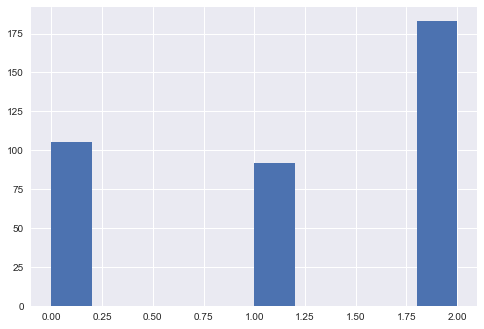

In [13]:
plt.hist(matches['Result'])

In [14]:
matches['home_team_goal']

24177    1
24178    1
24179    0
24180    0
24181    1
24182    1
24183    1
24184    0
24185    0
24186    0
24187    1
24188    0
24189    2
24190    3
24191    2
24192    3
24193    1
24194    1
24195    1
24196    1
24197    3
24198    3
24199    3
24200    2
24201    1
24202    1
24203    1
24204    0
24205    2
24206    2
        ..
24527    2
24528    0
24529    0
24530    1
24531    1
24532    3
24533    3
24534    1
24535    1
24536    0
24537    5
24538    1
24539    4
24540    1
24541    3
24542    0
24543    3
24544    2
24545    3
24546    1
24547    3
24548    5
24549    0
24550    1
24551    0
24552    2
24553    2
24554    3
24555    1
24556    3
Name: home_team_goal, dtype: int64

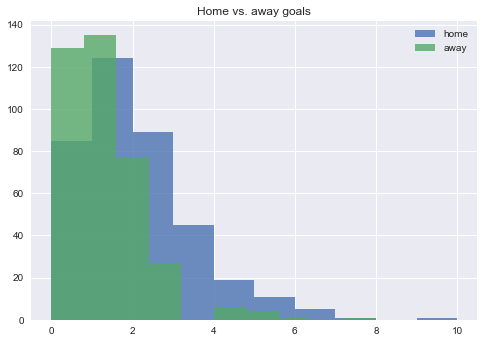

In [15]:
plt.hist(matches['home_team_goal'], alpha = 0.8, label = 'home')
plt.hist(matches['away_team_goal'], alpha = 0.8, label = 'away')
plt.title('Home vs. away goals')
plt.legend()

In [16]:
matches.groupby('home_team_api_id').sum()[['home_team_goal','away_team_goal']]

,home_team_goal,away_team_goal
home_team_api_id,,
7878,26,31
8302,38,21
8305,23,20
8306,25,17
8315,35,17
8370,29,29
8372,26,22
8558,22,28
8560,22,20


## Modelling

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
import random


In [20]:
matches['Result'].value_counts()

2.0    183
0.0    105
1.0     92
Name: Result, dtype: int64

In [21]:
indices = np.random.choice(matches.loc[matches['Result'] == 2].index, size=matches['Result'].value_counts()[0])

In [22]:
sub_matches = pd.concat([matches.loc[indices], matches.loc[(matches['Result'] == 1) | (matches['Result'] == 0)]])

In [23]:
sub_matches['Result'].value_counts()

0.0    105
2.0    105
1.0     92
Name: Result, dtype: int64

In [29]:
'''
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=333)
print(sss.get_n_splits(matches['home_team_api_id'], matches['Result']))
for train_index, test_index in sss.split(matches['home_team_api_id'], matches['Result']):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train = matches.loc[train_index,'home_team_api_id']
    X_test = matches.loc[test_index,'home_team_api_id']
    y_train, y_test = matches.loc[train_index, 'Result'], matches.loc[test_index,'Result']
'''

1
TRAIN: [137 207 186 335 257  58 277  12 149 166 239 124 256 212  23 255 146 352
  88  28 235 105 304 129 266 169 190 258 215 353 254 290  18 183  51 153
 126 373 291 176 171  32 131 332   0 356  54 175  69 200 350  41 121   4
 297 236 354 298  50 106 357  85  33 120 161  95 112 249 293 319 102 167
 376 122 100 325  56 213 143 237 344 194 279 360  60 133  57 168 301 303
 337 156 110 141 184 259  98 345 274 150 198 330  14  13  29 223 172 114
 328 109 292 355  15  16  73 111  39  61 270 358 307 123  40 287 315  81
 265 151 260 107  49 322 140 196 103  63  90 147  19 202 160 268 214 342
 154  67 253 377  10 139  75   9 226   3 329  47 165 145 269 240 346 252
 227  35  82 251 314 323  43 370 267 367 148 210 208 368  99  52 289 359
 241 178 203 182 372 281 164 246 296 300 119   6  31 288 144 276 128  87
  27 302 155 224 132 221 218 163 192  70 278 324 174  24  93 158 234 232
  92 273  66 305 242 108 180  38 333   5 271 225 310 378   7 231 229  37
 341 331  71 211 326 250  84 188 294  96 1

KeyError: 'None of [[137 207 186 335 257  58 277  12 149 166 239 124 256 212  23 255 146 352\n  88  28 235 105 304 129 266 169 190 258 215 353 254 290  18 183  51 153\n 126 373 291 176 171  32 131 332   0 356  54 175  69 200 350  41 121   4\n 297 236 354 298  50 106 357  85  33 120 161  95 112 249 293 319 102 167\n 376 122 100 325  56 213 143 237 344 194 279 360  60 133  57 168 301 303\n 337 156 110 141 184 259  98 345 274 150 198 330  14  13  29 223 172 114\n 328 109 292 355  15  16  73 111  39  61 270 358 307 123  40 287 315  81\n 265 151 260 107  49 322 140 196 103  63  90 147  19 202 160 268 214 342\n 154  67 253 377  10 139  75   9 226   3 329  47 165 145 269 240 346 252\n 227  35  82 251 314 323  43 370 267 367 148 210 208 368  99  52 289 359\n 241 178 203 182 372 281 164 246 296 300 119   6  31 288 144 276 128  87\n  27 302 155 224 132 221 218 163 192  70 278 324 174  24  93 158 234 232\n  92 273  66 305 242 108 180  38 333   5 271 225 310 378   7 231 229  37\n 341 331  71 211 326 250  84 188 294  96 162 216 136 366  46 321 159 177\n 248 125 308  59 347 363  11 181 348 195 362 299 339  20]] are in the [index]'

In [48]:
sub_matches = sub_matches.sample(frac = 1)
length = sub_matches.shape[0]
print(length)
train = sub_matches[:int(length*0.8)]
test = sub_matches[int(length*0.8):]

302


In [49]:
'''
length = matches.shape[0]
print(length)
train = matches[:int(length*0.8)]
test = matches[int(length*0.8):]
'''

'\nlength = matches.shape[0]\nprint(length)\ntrain = matches[:int(length*0.8)]\ntest = matches[int(length*0.8):]\n'

In [50]:
print(train['Result'].shape)
train['home_team_api_id'].shape

(241,)


(241,)

In [53]:
clf = MultinomialNB()
#clf.fit(train['home_team_api_id'].values.reshape(len(train),1), train['Result'])
clf.fit(pd.get_dummies(train['home_team_api_id']), train['Result'])
predictions = clf.predict(pd.get_dummies(test['home_team_api_id']))
accuracy = np.mean(predictions == test['Result'])
print('Accuracy', accuracy)

Accuracy 0.377049180328


In [54]:
predictions

array([ 0.,  0.,  2.,  1.,  2.,  0.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,
        2.,  2.,  0.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  0.,  2.,  2.,
        0.,  2.,  1.,  2.,  0.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,
        1.,  0.,  2.,  0.,  1.,  2.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,
        2.,  1.,  2.,  2.,  0.,  1.,  1.,  0.,  2.])

In [55]:
train['Result'].value_counts() # Seems to be predicting majority class

0.0    85
2.0    85
1.0    71
Name: Result, dtype: int64

In [43]:
np.unique(train['home_team_api_id'].values.reshape(len(train),1))

array([ 7878,  8302,  8305,  8306,  8315,  8370,  8372,  8558,  8560,
        8581,  8603,  8633,  8634,  9783,  9864,  9869,  9906,  9910,
       10205, 10267])

In [58]:
lrfit = LogisticRegression()
lrfit.fit(pd.get_dummies(train['home_team_api_id']), train['Result'])
predictions_lr = lrfit.predict(pd.get_dummies(test['home_team_api_id']))
accuracy_lr = np.mean(predictions_lr == test['Result'])
print('Accuracy', accuracy_lr)

Accuracy 0.377049180328


In [57]:
predictions

array([ 0.,  0.,  2.,  1.,  2.,  0.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,
        2.,  2.,  0.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  0.,  2.,  2.,
        0.,  2.,  1.,  2.,  0.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,
        1.,  0.,  2.,  0.,  1.,  2.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,
        2.,  1.,  2.,  2.,  0.,  1.,  1.,  0.,  2.])